In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import math

from sklearn.metrics import accuracy_score, precision_score, recall_score

In [2]:
df = pd.read_csv('./data/pima-indians.txt', delimiter=',')
df.columns = df.columns.str.strip()
df

,times_preg,glucose,dbp,tri_skin_thick,insulin,bmi,diabetes_ped_fun,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df.describe()

,times_preg,glucose,dbp,tri_skin_thick,insulin,bmi,diabetes_ped_fun,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
group = df.groupby('class').mean()
group

,times_preg,glucose,dbp,tri_skin_thick,insulin,bmi,diabetes_ped_fun,age
class,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


### Perm Functions

In [5]:
len_a = df['class'].value_counts().loc[1]

In [6]:
strong_indicators = []

In [7]:
def perm_fun(df, len_a, col):
    a = df.sample(n = len_a, replace = False)
    b = df[~df.index.isin(a.index)]
    
    return a[col].mean() - b[col].mean()

In [8]:
def col_report(df, len_a, col):
    actual_diff = group.loc[1][col] - group.loc[0][col]
    diffs = [perm_fun(df, len_a, col) for _ in range(1000)]
    
    plt.figure(figsize = (4,4))
    sns.histplot(diffs)
    plt.axvline(x = actual_diff, color = 'red')
    plt.title(f'Dist. for {col}')
    plt.show()
    
    p_val = np.array([np.abs(diff) > actual_diff for diff in diffs]).mean()
    
    print("Actual diff:", actual_diff)
    print("P-value:", p_val)
    
    return (actual_diff, p_val)

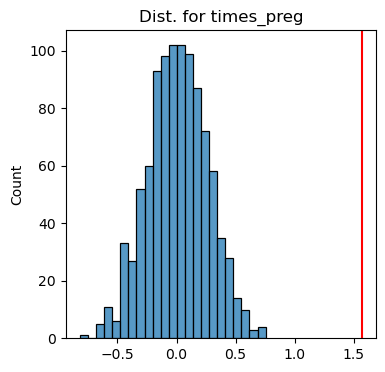

Actual diff: 1.567671641791045
P-value: 0.0


In [9]:
actual_diff, p_val = col_report(df, len_a, 'times_preg')
if (p_val < .05):
    strong_indicators.append('times_preg')

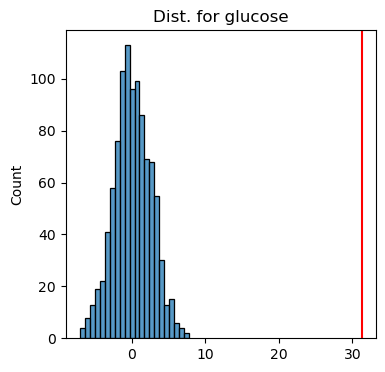

Actual diff: 31.277462686567148
P-value: 0.0


In [10]:
actual_diff, p_val = col_report(df, len_a, 'glucose')
if (p_val < .05):
    strong_indicators.append('glucose')

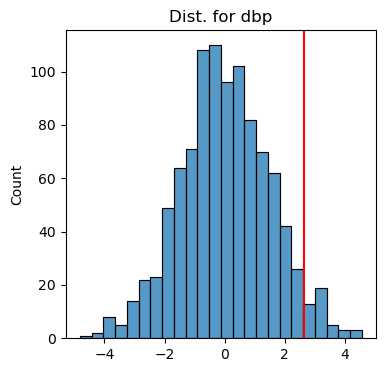

Actual diff: 2.640626865671649
P-value: 0.081


In [11]:
actual_diff, p_val = col_report(df, len_a, 'dbp')
if (p_val < .05):
    strong_indicators.append('dbp')

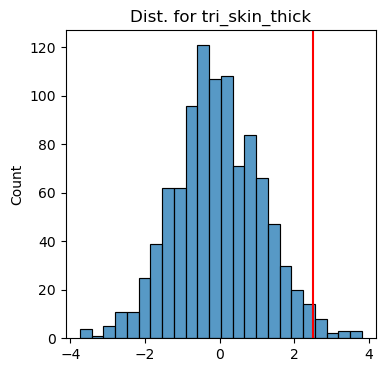

Actual diff: 2.50017910447761
P-value: 0.038


In [12]:
actual_diff, p_val = col_report(df, len_a, 'tri_skin_thick')
if (p_val < .05):
    strong_indicators.append('tri_skin_thick')

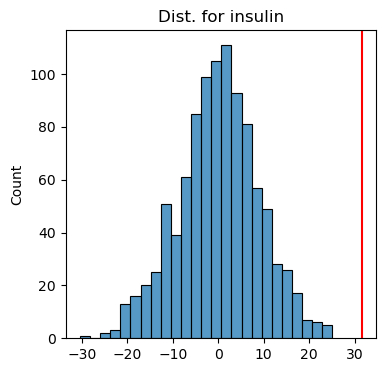

Actual diff: 31.543820895522387
P-value: 0.0


In [13]:
actual_diff, p_val = col_report(df, len_a, 'insulin')
if (p_val < .05):
    strong_indicators.append('insulin')

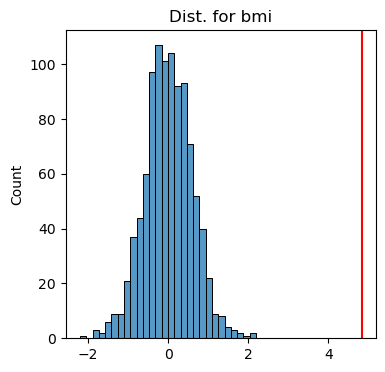

Actual diff: 4.838337313432838
P-value: 0.0


In [14]:
actual_diff, p_val = col_report(df, len_a, 'bmi')
if (p_val < .05):
    strong_indicators.append('bmi')

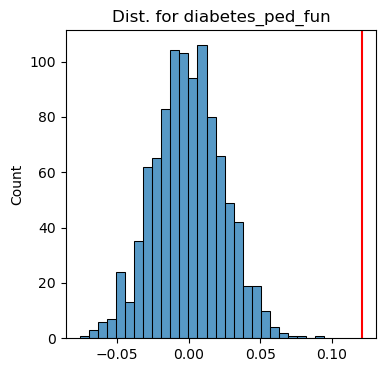

Actual diff: 0.12076599999999998
P-value: 0.0


In [15]:
actual_diff, p_val = col_report(df, len_a, 'diabetes_ped_fun')
if (p_val < .05):
    strong_indicators.append('diabetes_ped_fun')

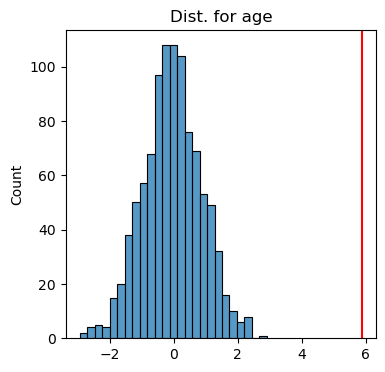

Actual diff: 5.877164179104479
P-value: 0.0


In [16]:
actual_diff, p_val = col_report(df, len_a, 'age')
if (p_val < .05):
    strong_indicators.append('age')

In [17]:
strong_indicators

['times_preg',
 'glucose',
 'tri_skin_thick',
 'insulin',
 'bmi',
 'diabetes_ped_fun',
 'age']

<AxesSubplot:>

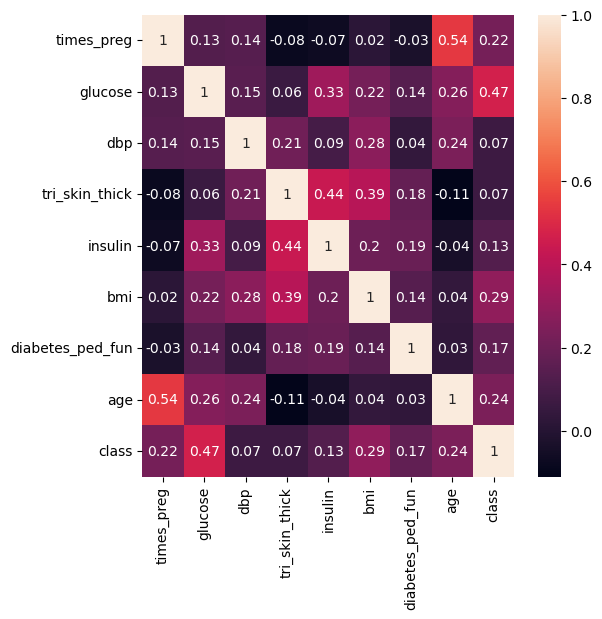

In [18]:
plt.figure(figsize = (6,6))
sns.heatmap(df.corr().round(2), annot = True)

In [19]:
def sigmoid(z):
    sigmoid = 1 / (1 + np.exp(-z))
    return sigmoid

In [123]:
def cost_function(w, b, x, y):

    total_cost = 0
    m = x.shape[0] # num training examples
    
    for i in range(m):
        
        f_wb_i = sigmoid(np.dot(w, x[i]) + b)
        
        if (f_wb_i == 1):
            # don't add anything to cost
            continue
        
        cost = y[i] * np.log(f_wb_i) + (1 - y[i]) * np.log(1 - f_wb_i) # cost function for log reg
        
        total_cost += cost
    
    total_cost = - (total_cost / m)
    
    return total_cost

In [124]:
def compute_gradient(w, b, x, y):
    
    m,n = x.shape
    dj_dw = np.zeros((n,))
    d_db = 0
    
    for i in range(m):
        f_wb_i = sigmoid(np.dot(w, x[i]) + b)
        
        for j in range(n):
            dj_dw[j] += (f_wb_i - y[i]) * x[i,j]
        d_db += f_wb_i - y[i]
        
    return dj_dw/m, d_db/m
        

In [125]:
def gradient_descent(w_in, b_in, x, y, alpha, iterations):
    
    cost_hist = []
    
    w = w_in.copy()
    b = b_in
    
    for i in range(iterations):
        dj_dw, dj_db = compute_gradient(w, b, x, y)
        
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        
        cost = cost_function(w, b, x, y)
        cost_hist.append(cost)
        
        if (i % 100 == 0):
            print(f'Cost at iteration {i}: {cost}')
            
    return w, b
            

In [126]:
df[strong_indicators]

,times_preg,glucose,tri_skin_thick,insulin,bmi,diabetes_ped_fun,age
0,0.639530,0.847771,0.906679,-0.692439,0.203880,0.468187,1.425067
1,-0.844335,-1.122665,0.530556,-0.692439,-0.683976,-0.364823,-0.190548
2,1.233077,1.942458,-1.287373,-0.692439,-1.102537,0.604004,-0.105515
3,-0.844335,-0.997558,0.154433,0.123221,-0.493721,-0.920163,-1.040871
4,-1.141108,0.503727,0.906679,0.765337,1.408828,5.481337,-0.020483
...,...,...,...,...,...,...,...
763,1.826623,-0.622237,1.721613,0.869464,0.115094,-0.908090,2.530487
764,-0.547562,0.034575,0.405181,-0.692439,0.609757,-0.398023,-0.530677
765,0.342757,0.003299,0.154433,0.279412,-0.734711,-0.684747,-0.275580
766,-0.844335,0.159683,-1.287373,-0.692439,-0.240048,-0.370859,1.169970


In [127]:
# normalize predictor columns

for i in range(len(strong_indicators)):
    df[strong_indicators[i]] = (df[strong_indicators[i]] - df[strong_indicators[i]].mean()) \
    / df[strong_indicators[i]].std()

In [128]:
df[strong_indicators].head()

,times_preg,glucose,tri_skin_thick,insulin,bmi,diabetes_ped_fun,age
0,0.639530,0.847771,0.906679,-0.692439,0.203880,0.468187,1.425067
1,-0.844335,-1.122665,0.530556,-0.692439,-0.683976,-0.364823,-0.190548
2,1.233077,1.942458,-1.287373,-0.692439,-1.102537,0.604004,-0.105515
3,-0.844335,-0.997558,0.154433,0.123221,-0.493721,-0.920163,-1.040871
4,-1.141108,0.503727,0.906679,0.765337,1.408828,5.481337,-0.020483


In [130]:
iterations = 10000
alpha = .01

X_train = np.array(df[strong_indicators])
y_train = np.array(df['class']).reshape(-1,1)

w_in = np.array([5, 1, 2, 3, 4, 5, 5])
b_in = 10

w_out, b_out = gradient_descent(w_in, b_in, X_train, y_train, alpha, iterations)

Cost at iteration 0: [5.13235894]
Cost at iteration 100: [4.98348208]
Cost at iteration 200: [4.7937562]
Cost at iteration 300: [4.60849642]
Cost at iteration 400: [4.42896225]
Cost at iteration 500: [4.25460094]
Cost at iteration 600: [4.13227024]
Cost at iteration 700: [3.96721974]
Cost at iteration 800: [3.80767338]
Cost at iteration 900: [3.65240506]
Cost at iteration 1000: [3.50187792]
Cost at iteration 1100: [3.3560212]
Cost at iteration 1200: [3.26145076]
Cost at iteration 1300: [3.12332787]
Cost at iteration 1400: [2.98881317]
Cost at iteration 1500: [2.85867001]
Cost at iteration 1600: [2.73246644]
Cost at iteration 1700: [2.61004827]
Cost at iteration 1800: [2.49136891]
Cost at iteration 1900: [2.37630681]
Cost at iteration 2000: [2.26474495]
Cost at iteration 2100: [2.15657694]
Cost at iteration 2200: [2.05171694]
Cost at iteration 2300: [1.95009624]
Cost at iteration 2400: [1.85166558]
Cost at iteration 2500: [1.80332676]
Cost at iteration 2600: [1.70977439]
Cost at iterati

In [131]:
w_out, b_out

(array([ 0.41169534,  1.10874772, -0.05695413, -0.12291395,  0.68505609,
         0.32293779,  0.11195011]),
 array([-0.87442973]))

In [132]:
def model_prediction(w, b, x):
    pred = sigmoid(np.dot(w, x) + b)
    return pred

In [133]:
df[strong_indicators].iloc[0]

times_preg          0.639530
glucose             0.847771
tri_skin_thick      0.906679
insulin            -0.692439
bmi                 0.203880
diabetes_ped_fun    0.468187
age                 1.425067
Name: 0, dtype: float64

In [134]:
df['class']

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: class, Length: 768, dtype: int64

In [135]:
predictions = df[strong_indicators].transpose().apply(lambda x: model_prediction(w_out, b_out, np.array(x)))
predictions = predictions.transpose()

In [136]:
predictions.head()

,0
0,0.692684
1,0.046548
2,0.797912
3,0.042946
4,0.858336


In [137]:
group

,times_preg,glucose,dbp,tri_skin_thick,insulin,bmi,diabetes_ped_fun,age
class,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [141]:
df['pred'] = predictions
df['decision'] = df.pred.apply(lambda x: 1 if x > .5 else 0)
df

,times_preg,glucose,dbp,tri_skin_thick,insulin,bmi,diabetes_ped_fun,age,class,pred,decision
0,0.639530,0.847771,72,0.906679,-0.692439,0.203880,0.468187,1.425067,1,0.692684,1
1,-0.844335,-1.122665,66,0.530556,-0.692439,-0.683976,-0.364823,-0.190548,0,0.046548,0
2,1.233077,1.942458,64,-1.287373,-0.692439,-1.102537,0.604004,-0.105515,1,0.797912,1
3,-0.844335,-0.997558,66,0.154433,0.123221,-0.493721,-0.920163,-1.040871,0,0.042946,0
4,-1.141108,0.503727,40,0.906679,0.765337,1.408828,5.481337,-0.020483,1,0.858336,1
...,...,...,...,...,...,...,...,...,...,...,...
763,1.826623,-0.622237,76,1.721613,0.869464,0.115094,-0.908090,2.530487,0,0.279214,0
764,-0.547562,0.034575,70,0.405181,-0.692439,0.609757,-0.398023,-0.530677,0,0.316540,0
765,0.342757,0.003299,72,0.154433,0.279412,-0.734711,-0.684747,-0.275580,0,0.178272,0
766,-0.844335,0.159683,60,-1.287373,-0.692439,-0.240048,-0.370859,1.169970,1,0.261190,0


In [142]:
print("Accuracy score:", np.round(accuracy_score(df['class'], df.decision) ,3))
print("Precision score:", np.round(precision_score(df['class'], df.decision) ,3))
print("Recall score:", np.round(recall_score(df['class'], df.decision) ,3))

Accuracy score: 0.779
Precision score: 0.738
Recall score: 0.567
